In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Insurance Claim Fraud Detection.csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
df.shape

(1000, 40)

There are 1000 rows and 40 columns

In [4]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

There is null values in the column _c39

In [5]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

There are columns with categorical values and numerical values.

In [6]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


These are the statistical value of the dataset

In [7]:
df.drop('_c39',axis=1,inplace=True)

Dropped the column _c39

In [8]:
df["fraud_reported"].unique()

array(['Y', 'N'], dtype=object)

In [9]:
df["fraud_reported"].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

There are 753 N and 247 Y in the target column

# EDA

Univariate analysis

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

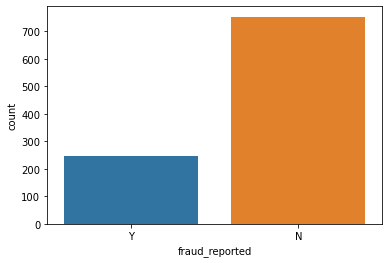

In [10]:
sn.countplot(df["fraud_reported"])

All 2 values are not equally distributed so there is imbalance isssue exists.

In [11]:
for column in df.columns:
    if df[column].dtype==object:
        print(df[column].value_counts())
        print('*********')

01-01-2006    3
05-08-1992    3
28-04-1992    3
30-08-1993    2
28-01-2010    2
             ..
08-07-2001    1
18-02-1997    1
15-11-2000    1
27-10-2013    1
07-07-1997    1
Name: policy_bind_date, Length: 951, dtype: int64
*********
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
*********
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
*********
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
*********
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
*********
machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: ins

These are the value counts of each of the columns.  Here some are ? . We can replace that

In [12]:
df=df.replace('?','No info')

Replaced ? with No info

In [13]:
for column in df.columns:
    if df[column].dtype==object:
        print(df[column].value_counts())
        print('*********')

01-01-2006    3
05-08-1992    3
28-04-1992    3
30-08-1993    2
28-01-2010    2
             ..
08-07-2001    1
18-02-1997    1
15-11-2000    1
27-10-2013    1
07-07-1997    1
Name: policy_bind_date, Length: 951, dtype: int64
*********
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
*********
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
*********
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
*********
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
*********
machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: ins

? replaced with No info

In [14]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [15]:
df['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

There is row with negative value.  So we can drop it.

In [16]:
df.drop(df[df['umbrella_limit']==-1000000].index,inplace=True)


In [17]:
df.drop(['policy_number','insured_zip','incident_location'],axis=1,inplace=True)

In [18]:
df['incident_Date']=df['incident_date'].str.split('-').str[0]
df['incident_Month']=df['incident_date'].str.split('-').str[1]
df['incident_Year']=df['incident_date'].str.split('-').str[2]

divided ['incident_date] into three other columns

In [19]:
df.drop('incident_Year',axis=1,inplace=True)

In [20]:
df['policy_bind_Date']=df['policy_bind_date'].str.split('-').str[0]
df['policy_bind_Month']=df['policy_bind_date'].str.split('-').str[1]
df['policy_bind_Year']=df['policy_bind_date'].str.split('-').str[2]

 divided policy_bind_date into three other columns

In [21]:
df.drop('policy_bind_Date',axis=1,inplace=True)

Dropped incident_Year and policy_bind_Date

In [22]:
df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,incident_Date,incident_Month,policy_bind_Month,policy_bind_Year
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,MALE,MD,...,13020,52080,Saab,92x,2004,Y,25,01,10,2014
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,MALE,MD,...,780,3510,Mercedes,E400,2007,Y,21,01,06,2006
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,...,3850,23100,Dodge,RAM,2007,N,22,02,09,2000
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,...,6340,50720,Chevrolet,Tahoe,2014,Y,10,01,05,1990
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,MALE,Associate,...,650,4550,Accura,RSX,2009,N,17,02,06,2014


In [23]:
df.shape

(999, 40)

In [24]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,999.000000,999.000000,999.000000,999.000000,9.990000e+02,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,203.873874,38.944945,1136.636637,1256.323934,1.103103e+06,25151.251251,-26820.520521,11.642643,1.839840,0.992993,1.487487,52720.500501,7432.292292,7389.839840,37898.368368,2005.112112
std,115.142928,9.144354,611.839681,244.275843,2.297594e+06,27874.792269,28105.366259,6.954722,1.019044,0.819936,1.111785,26382.199299,4883.266266,4817.316312,18870.924206,6.011966
min,0.000000,19.000000,500.000000,433.330000,0.000000e+00,0.000000,-111100.000000,0.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000
25%,115.500000,32.000000,500.000000,1089.185000,0.000000e+00,0.000000,-51500.000000,6.000000,1.000000,0.000000,1.000000,41775.000000,4290.000000,4440.000000,30275.000000,2000.000000
50%,199.000000,38.000000,1000.000000,1257.040000,0.000000e+00,0.000000,-24100.000000,12.000000,1.000000,1.000000,1.000000,57970.000000,6770.000000,6750.000000,42080.000000,2005.000000
75%,276.000000,44.000000,2000.000000,1415.710000,0.000000e+00,51050.000000,0.000000,17.000000,3.000000,2.000000,2.000000,70550.000000,11310.000000,10870.000000,50775.000000,2010.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.000000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000


There are 999 rows and 40 columns

In [25]:
df.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'incident_Date',
       'incident_Month', 'policy_bind_Month', 'policy_bind_Year'],
      dtype='object')

<AxesSubplot:xlabel='total_claim_amount', ylabel='count'>

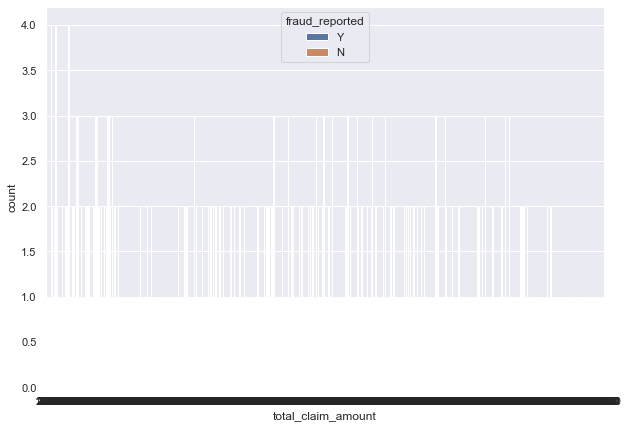

In [26]:
plt.figure(figsize=(10, 7))
sn. set(color_codes=True)
sn.countplot(x='total_claim_amount',hue='fraud_reported',data= df )

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='count'>

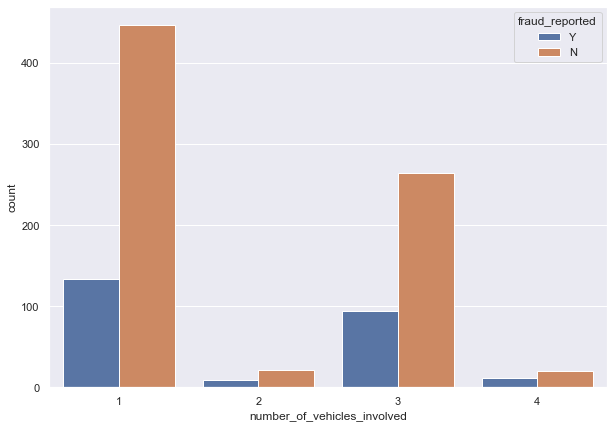

In [27]:
plt.figure(figsize=(10, 7))
sn.countplot(x='number_of_vehicles_involved',hue='fraud_reported',data=df)

Most fraud cases included where number_of_vehicles_involved is more than 1

<AxesSubplot:xlabel='incident_city', ylabel='count'>

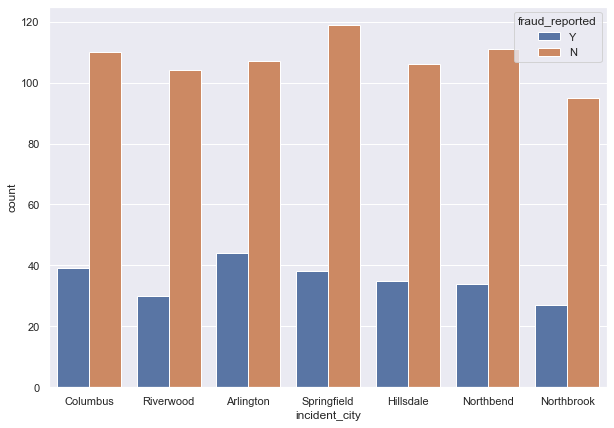

In [28]:
plt.figure(figsize=(10, 7))
sn.countplot(x='incident_city',hue='fraud_reported',data=df)

In all cities fraud reported is almost same

<AxesSubplot:xlabel='incident_state', ylabel='count'>

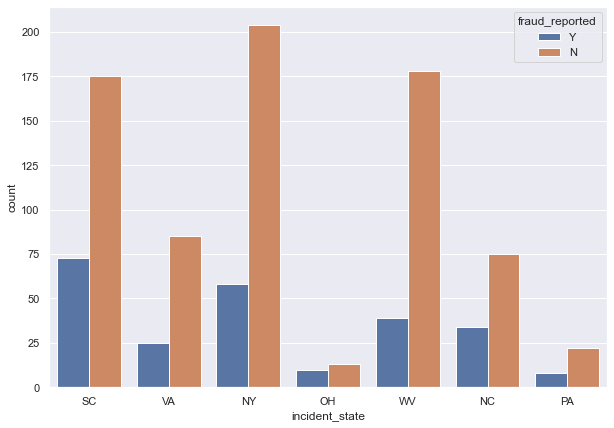

In [29]:
plt.figure(figsize=(10, 7))
sn.countplot(x='incident_state',hue='fraud_reported',data=df)

Most fraud incident involved in the cities where SC, VA,NY,OH, WV,NV AND PA

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

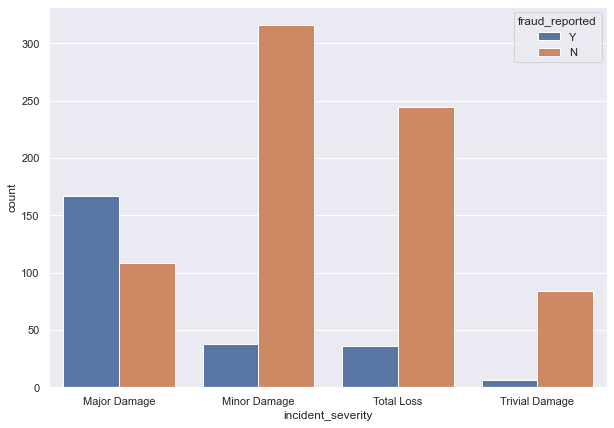

In [30]:
plt.figure(figsize=(10, 7))
sn.countplot(x='incident_severity',hue='fraud_reported',data=df)


Most of the fraud report is in Major Damage

<AxesSubplot:xlabel='incident_type', ylabel='count'>

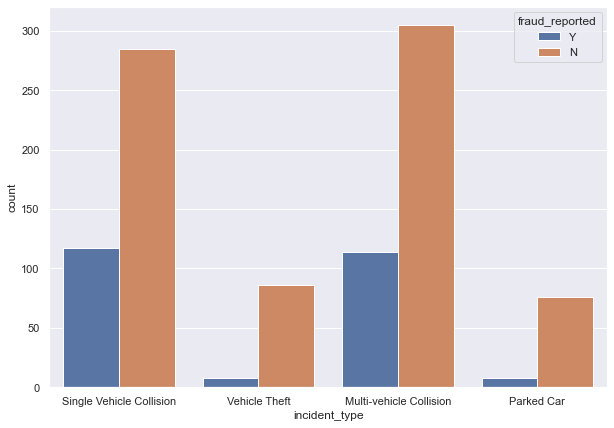

In [31]:
plt.figure(figsize=(10, 7))
sn.countplot(x='incident_type',hue='fraud_reported',data=df)

Most of the fraud happend in Single Vehicle Collision, Vehical Theft, Multi_vehicle Collision, Parked Car

<AxesSubplot:xlabel='incident_Month', ylabel='count'>

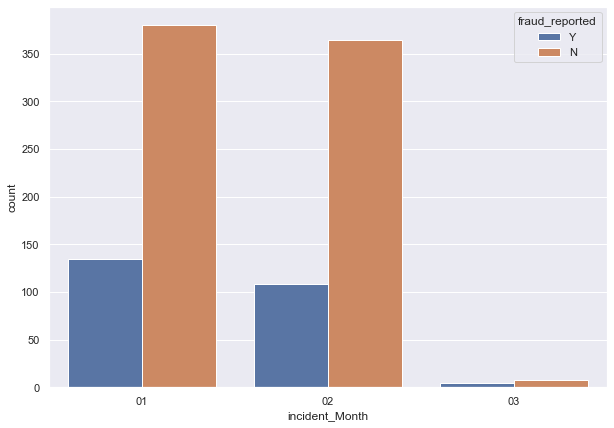

In [32]:
plt.figure(figsize=(10, 7))
sn.countplot(x='incident_Month',hue='fraud_reported',data=df)

Most of the fraud occurs in january and incident_Month

In [33]:
cor=df.corr()
cor

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922141,0.027553,0.004785,0.016146,0.007032,0.019559,0.070522,0.015319,-0.009328,0.058708,0.061106,0.065185,0.033613,0.059979,0.000763
age,0.922141,1.000000,0.029553,0.014293,0.018441,-0.006777,0.007052,0.087103,0.022386,-0.015286,0.052513,0.069427,0.075451,0.060350,0.062131,0.001862
policy_deductable,0.027553,0.029553,1.000000,-0.002897,0.009927,0.034305,-0.022574,0.061173,0.050401,-0.024055,0.066224,0.024516,0.039370,0.067063,0.006967,0.024570
policy_annual_premium,0.004785,0.014293,-0.002897,1.000000,-0.005941,-0.013441,0.023237,-0.001644,-0.045732,0.027209,0.002480,0.008576,-0.017712,-0.012359,0.019728,-0.048775
umbrella_limit,0.016146,0.018441,0.009927,-0.005941,1.000000,-0.048134,-0.023202,-0.023088,-0.022041,0.021659,-0.007144,-0.038972,-0.045220,-0.021998,-0.037166,0.008520
capital-gains,0.007032,-0.006777,0.034305,-0.013441,-0.048134,1.000000,-0.046083,-0.016236,0.060944,0.054799,-0.018056,0.017425,0.026154,0.001043,0.017327,0.030078
capital-loss,0.019559,0.007052,-0.022574,0.023237,-0.023202,-0.046083,1.000000,-0.025252,-0.014120,-0.023290,-0.040934,-0.037622,-0.046303,-0.024850,-0.034271,-0.055258
incident_hour_of_the_day,0.070522,0.087103,0.061173,-0.001644,-0.023088,-0.016236,-0.025252,1.000000,0.120999,-0.034353,0.006613,0.217668,0.165730,0.179511,0.215596,0.021689
number_of_vehicles_involved,0.015319,0.022386,0.050401,-0.045732,-0.022041,0.060944,-0.014120,0.120999,1.000000,0.013046,-0.015037,0.276005,0.224923,0.221272,0.271176,0.033355
bodily_injuries,-0.009328,-0.015286,-0.024055,0.027209,0.021659,0.054799,-0.023290,-0.034353,0.013046,1.000000,-0.006142,0.049090,0.047635,0.042308,0.045502,-0.022403


These are the correlation between the variables

# Bivariate analysis

<AxesSubplot:>

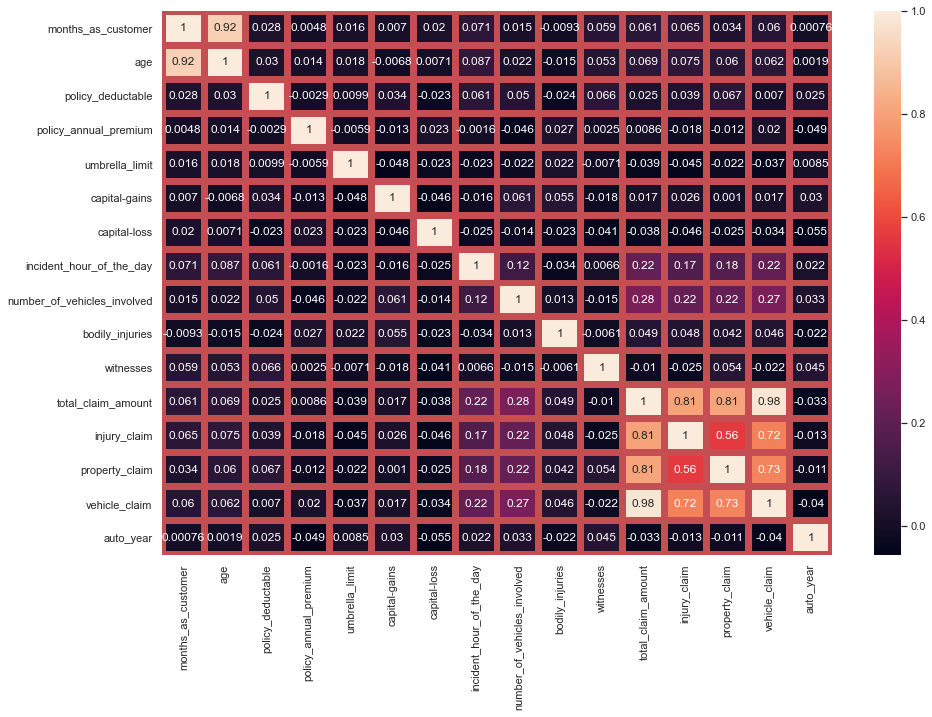

In [34]:
plt.figure(figsize=[15,10])
sn.heatmap(cor,annot=True,linewidths=6,linecolor='r')

We can see that total_claim_amount , injury_claim, property_claim and vehicle_claim are highly correlated with each other.

In [35]:
df.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'incident_Date',
       'incident_Month', 'policy_bind_Month', 'policy_bind_Year'],
      dtype='object')

<AxesSubplot:title={'center':'comparison between total_claim_amount and fraud_reported'}, xlabel='total_claim_amount', ylabel='fraud_reported'>

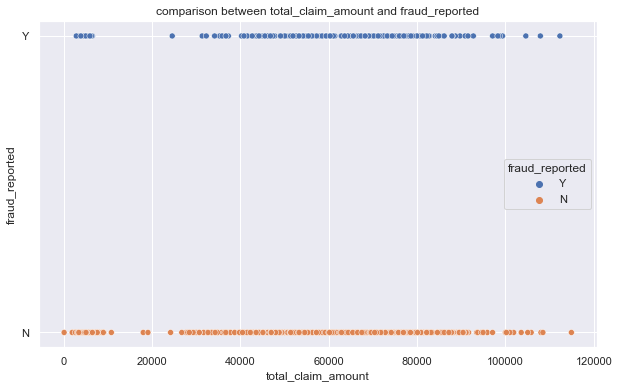

In [36]:
plt.figure(figsize=[10,6])
plt.title("comparison between total_claim_amount and fraud_reported")
sn.scatterplot(df['total_claim_amount'],df['fraud_reported'],hue=df["fraud_reported"])

<AxesSubplot:title={'center':'comparison between incident_Date and fraud_reported'}, xlabel='incident_Date', ylabel='fraud_reported'>

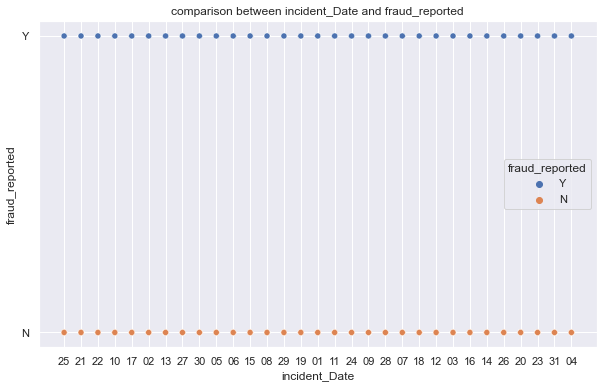

In [37]:
plt.figure(figsize=[10,6])
plt.title("comparison between incident_Date and fraud_reported")
sn.scatterplot(df['incident_Date'],df['fraud_reported'],hue=df["fraud_reported"])

<AxesSubplot:title={'center':'comparison between incident_Month and fraud_reported'}, xlabel='fraud_reported', ylabel='incident_Month'>

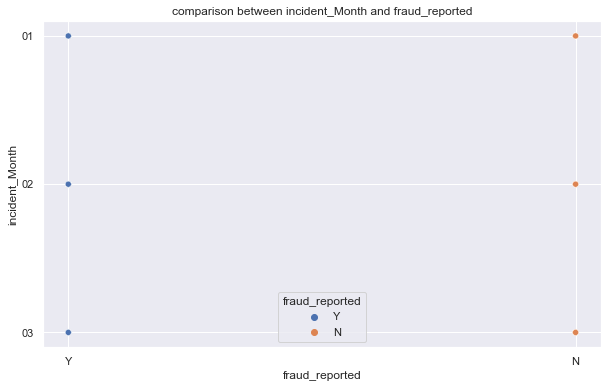

In [38]:
plt.figure(figsize=[10,6])
plt.title("comparison between incident_Month and fraud_reported")
sn.scatterplot(df['fraud_reported'],df['incident_Month'],hue=df["fraud_reported"])

<AxesSubplot:title={'center':'comparison between number_of_vehicles_involved and fraud_reported'}, xlabel='fraud_reported', ylabel='number_of_vehicles_involved'>

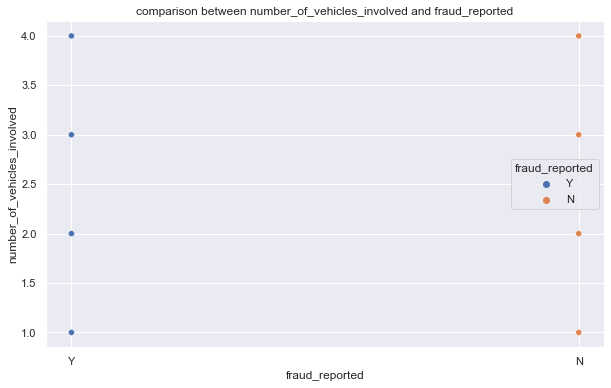

In [39]:
plt.figure(figsize=[10,6])
plt.title("comparison between number_of_vehicles_involved and fraud_reported")
sn.scatterplot(df['fraud_reported'],df['number_of_vehicles_involved'],hue=df["fraud_reported"])

<AxesSubplot:title={'center':'comparison between incident_city and fraud_reported'}, xlabel='fraud_reported', ylabel='incident_city'>

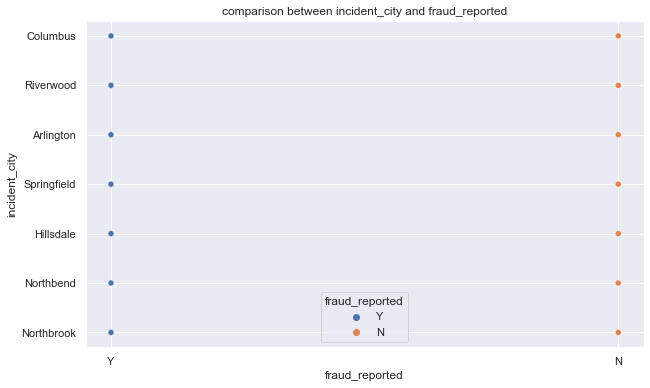

In [40]:
plt.figure(figsize=[10,6])
plt.title("comparison between incident_city and fraud_reported")
sn.scatterplot(df['fraud_reported'],df['incident_city'],hue=df["fraud_reported"])

<AxesSubplot:title={'center':'comparison between authorities_contacted and fraud_reported'}, xlabel='fraud_reported', ylabel='authorities_contacted'>

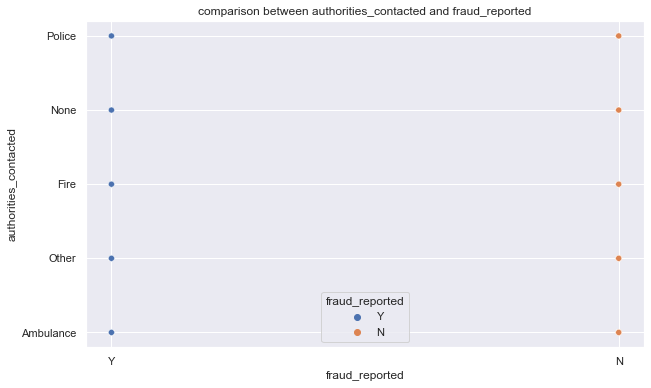

In [41]:
plt.figure(figsize=[10,6])
plt.title("comparison between authorities_contacted and fraud_reported")
sn.scatterplot(df['fraud_reported'],df['authorities_contacted'],hue=df["fraud_reported"])

<AxesSubplot:title={'center':'comparison between collision_type and fraud_reported'}, xlabel='fraud_reported', ylabel='collision_type'>

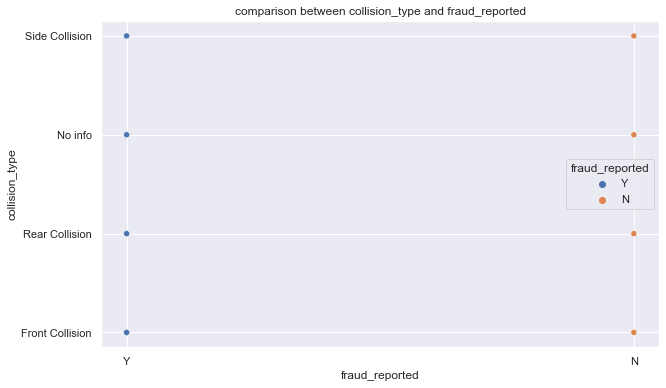

In [42]:
plt.figure(figsize=[10,6])
plt.title("comparison between collision_type and fraud_reported")
sn.scatterplot(df['fraud_reported'],df['collision_type'],hue=df["fraud_reported"])

<AxesSubplot:title={'center':'comparison between total_claim_amount and fraud_reported'}, xlabel='fraud_reported', ylabel='total_claim_amount'>

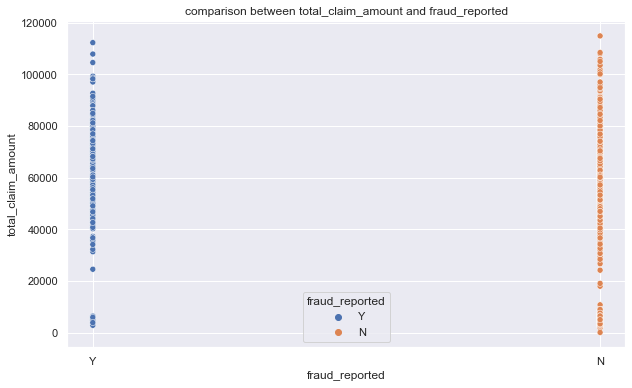

In [43]:
plt.figure(figsize=[10,6])
plt.title("comparison between total_claim_amount and fraud_reported")
sn.scatterplot(df['fraud_reported'],df['total_claim_amount'],hue=df["fraud_reported"])

<AxesSubplot:title={'center':'comparison between injury_claim and fraud_reported'}, xlabel='fraud_reported', ylabel='injury_claim'>

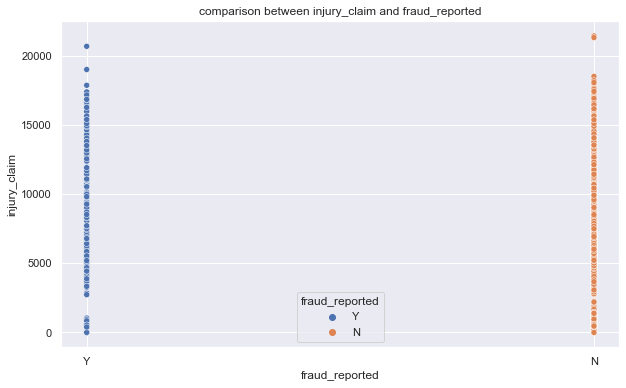

In [44]:
plt.figure(figsize=[10,6])
plt.title("comparison between injury_claim and fraud_reported")
sn.scatterplot(df['fraud_reported'],df['injury_claim'],hue=df["fraud_reported"])

<AxesSubplot:title={'center':'comparison between property_claim and fraud_reported'}, xlabel='fraud_reported', ylabel='property_claim'>

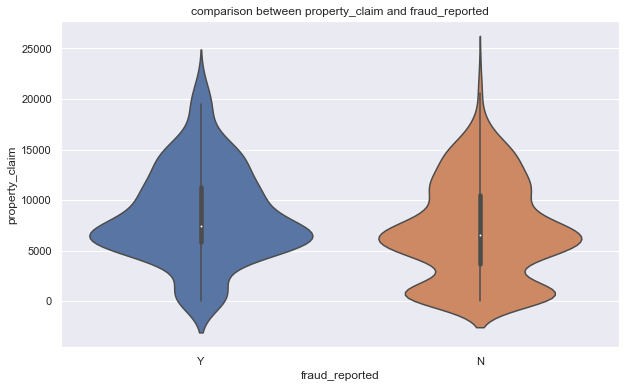

In [45]:
plt.figure(figsize=[10,6])
plt.title("comparison between property_claim and fraud_reported")
sn.violinplot(y='property_claim',x='fraud_reported',data=df)

<AxesSubplot:title={'center':'comparison between auto_model and fraud_reported'}, xlabel='fraud_reported', ylabel='auto_model'>

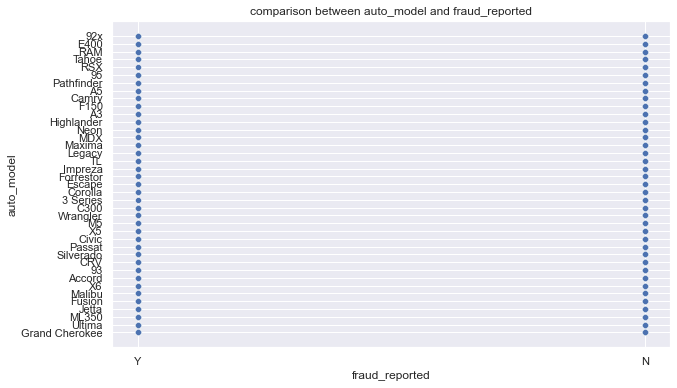

In [46]:
plt.figure(figsize=[10,6])
plt.title("comparison between auto_model and fraud_reported")
sn.scatterplot(x='fraud_reported',y='auto_model',data=df)

<AxesSubplot:title={'center':'comparison between insured_sex and fraud_reported'}, xlabel='fraud_reported', ylabel='insured_sex'>

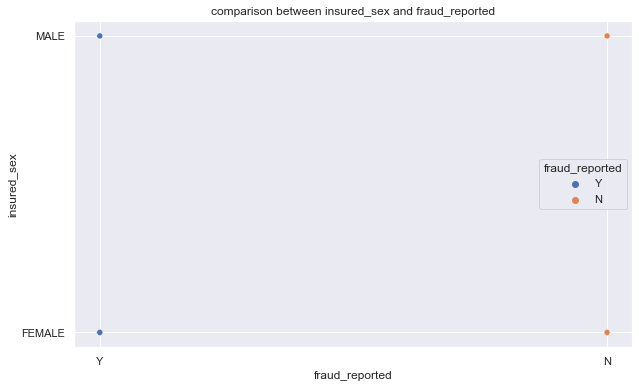

In [47]:
plt.figure(figsize=[10,6])
plt.title("comparison between insured_sex and fraud_reported")
sn.scatterplot(df['fraud_reported'],df['insured_sex'],hue=df["fraud_reported"])

<AxesSubplot:title={'center':'comparison between insured_relationship and fraud_reported'}, xlabel='fraud_reported', ylabel='insured_relationship'>

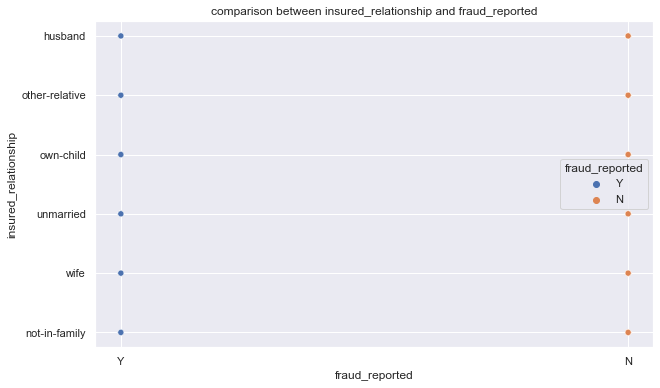

In [48]:
plt.figure(figsize=[10,6])
plt.title("comparison between insured_relationship and fraud_reported")
sn.scatterplot(df['fraud_reported'],df['insured_relationship'],hue=df["fraud_reported"])

<AxesSubplot:title={'center':'comparison between capital-gains and fraud_reported'}, xlabel='fraud_reported', ylabel='capital-gains'>

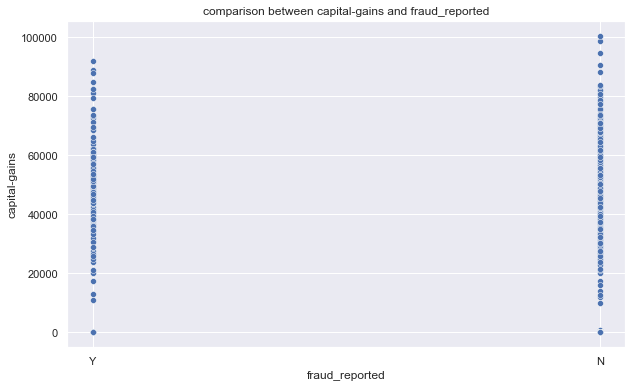

In [49]:
plt.figure(figsize=[10,6])
plt.title("comparison between capital-gains and fraud_reported")
sn.scatterplot(x='fraud_reported',y='capital-gains',data=df)

<AxesSubplot:title={'center':'comparison between capital-loss and fraud_reported'}, xlabel='fraud_reported', ylabel='capital-loss'>

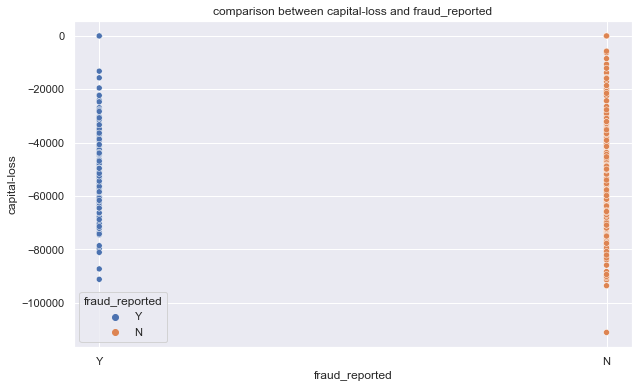

In [50]:
plt.figure(figsize=[10,6])
plt.title("comparison between capital-loss and fraud_reported")
sn.scatterplot(df['fraud_reported'],df['capital-loss'],hue=df["fraud_reported"])

<AxesSubplot:title={'center':'comparison between auto_make and fraud_reported'}, xlabel='fraud_reported', ylabel='auto_make'>

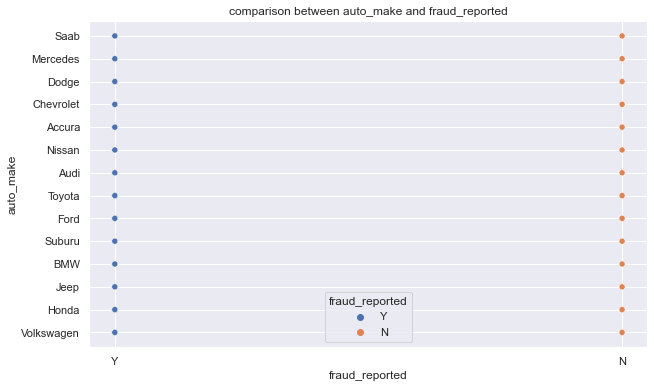

In [51]:
plt.figure(figsize=[10,6])
plt.title("comparison between auto_make and fraud_reported")
sn.scatterplot(df['fraud_reported'],df['auto_make'],hue=df["fraud_reported"])

<AxesSubplot:title={'center':'comparison between auto_model and fraud_reported'}, xlabel='fraud_reported', ylabel='auto_model'>

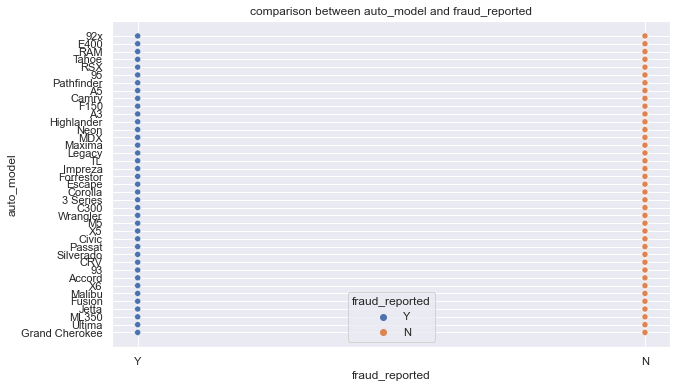

In [52]:
plt.figure(figsize=[10,6])
plt.title("comparison between auto_model and fraud_reported")
sn.scatterplot(df['fraud_reported'],df['auto_model'],hue=df["fraud_reported"])

<AxesSubplot:title={'center':'comparison between vehicle_claim and fraud_reported'}, xlabel='fraud_reported', ylabel='vehicle_claim'>

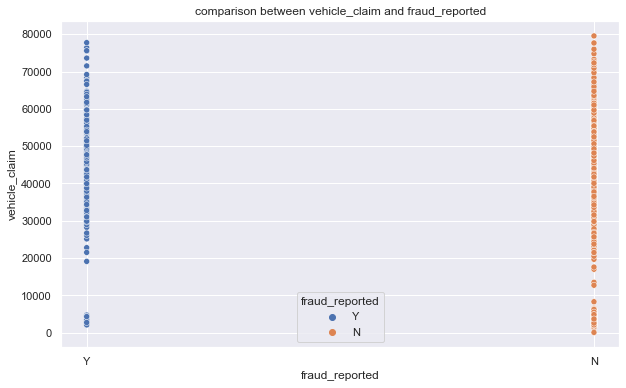

In [53]:
plt.figure(figsize=[10,6])
plt.title("comparison between vehicle_claim and fraud_reported")
sn.scatterplot(df['fraud_reported'],df['vehicle_claim'],hue=df["fraud_reported"])

<AxesSubplot:title={'center':'comparison between capital-loss and fraud_reported'}, xlabel='fraud_reported', ylabel='capital-loss'>

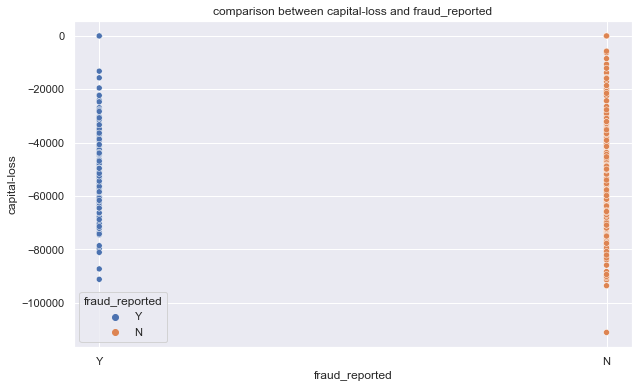

In [54]:
plt.figure(figsize=[10,6])
plt.title("comparison between capital-loss and fraud_reported")
sn.scatterplot(df['fraud_reported'],df['capital-loss'],hue=df["fraud_reported"])

months_as_customer                AxesSubplot(0.125,0.816017;0.168478x0.0639831)
age                            AxesSubplot(0.327174,0.816017;0.168478x0.0639831)
policy_deductable              AxesSubplot(0.529348,0.816017;0.168478x0.0639831)
policy_annual_premium          AxesSubplot(0.731522,0.816017;0.168478x0.0639831)
umbrella_limit                    AxesSubplot(0.125,0.739237;0.168478x0.0639831)
capital-gains                  AxesSubplot(0.327174,0.739237;0.168478x0.0639831)
capital-loss                   AxesSubplot(0.529348,0.739237;0.168478x0.0639831)
incident_hour_of_the_day       AxesSubplot(0.731522,0.739237;0.168478x0.0639831)
number_of_vehicles_involved       AxesSubplot(0.125,0.662458;0.168478x0.0639831)
bodily_injuries                AxesSubplot(0.327174,0.662458;0.168478x0.0639831)
witnesses                      AxesSubplot(0.529348,0.662458;0.168478x0.0639831)
total_claim_amount             AxesSubplot(0.731522,0.662458;0.168478x0.0639831)
injury_claim                

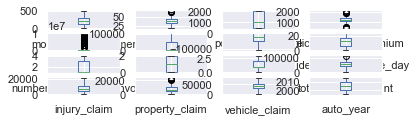

In [55]:
df.plot(kind="box",subplots=True,layout=(10,4))

There are outliers in 5 columns

# Converting string data into numerical data by using LabelEncoder

In [56]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [57]:
cg_data = df.select_dtypes(exclude=['int64', 'float','int32'])
for val in cg_data:
    df[val]=le.fit_transform(df[val].astype(str))

In [58]:
df.dtypes

months_as_customer               int64
age                              int64
policy_bind_date                 int32
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_date                    int32
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int32
bodily_injuries          

All columns are converted to numerical data

# Outlier Remover

In [59]:
from scipy.stats import zscore

In [60]:
z=np.abs(zscore(df))
df1=df[(z<3).all(axis=1)]

# skewness

In [61]:
df1.skew()

months_as_customer             0.364465
age                            0.476197
policy_bind_date               0.006391
policy_state                  -0.036279
policy_csl                     0.096461
policy_deductable              0.474601
policy_annual_premium          0.036946
umbrella_limit                 1.800910
insured_sex                    0.141529
insured_education_level        0.005217
insured_occupation            -0.055821
insured_hobbies               -0.060795
insured_relationship           0.079587
capital-gains                  0.464949
capital-loss                  -0.375180
incident_date                  0.003303
incident_type                  0.092483
collision_type                -0.176954
incident_severity              0.276441
authorities_contacted         -0.115788
incident_state                -0.150831
incident_city                  0.042727
incident_hour_of_the_day      -0.038691
number_of_vehicles_involved    0.508038
property_damage                0.060699


There is a skewness in umbrella_limit and tota_claim amount. Skewness =/-5 will be treated.  fraud_reported is target column 

In [62]:
from sklearn.preprocessing import power_transform

In [63]:
df1[['umbrella_limit','total_claim_amount']]=power_transform(df1[['umbrella_limit','total_claim_amount']])

In [64]:
df1.skew()

months_as_customer             0.364465
age                            0.476197
policy_bind_date               0.006391
policy_state                  -0.036279
policy_csl                     0.096461
policy_deductable              0.474601
policy_annual_premium          0.036946
umbrella_limit                 1.582932
insured_sex                    0.141529
insured_education_level        0.005217
insured_occupation            -0.055821
insured_hobbies               -0.060795
insured_relationship           0.079587
capital-gains                  0.464949
capital-loss                  -0.375180
incident_date                  0.003303
incident_type                  0.092483
collision_type                -0.176954
incident_severity              0.276441
authorities_contacted         -0.115788
incident_state                -0.150831
incident_city                  0.042727
incident_hour_of_the_day      -0.038691
number_of_vehicles_involved    0.508038
property_damage                0.060699


# Dividing Data into x and y

In [65]:
x=df.drop(["fraud_reported"],axis=1)
y=df["fraud_reported"]

In [66]:
x.shape

(999, 39)

In [67]:
y.shape

(999,)

# scaling

In [68]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

Scaled the x data

# Splitting the Data for Training and Testing

In [69]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=12)

In [72]:
x_train.shape

(799, 39)

In [73]:
x_test.shape

(200, 39)

In [74]:
y_train.shape

(799,)

In [75]:
y_test.shape

(200,)

# DecisionTreeClassifier

In [76]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [77]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.82
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       154
           1       0.61      0.59      0.60        46

    accuracy                           0.82       200
   macro avg       0.75      0.74      0.74       200
weighted avg       0.82      0.82      0.82       200



Got the accuracy with 82%

# SVC

In [78]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')#It is a type of kernel we have aligned. Rbf is radial basis function.
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.76
              precision    recall  f1-score   support

           0       0.77      0.98      0.86       154
           1       0.25      0.02      0.04        46

    accuracy                           0.76       200
   macro avg       0.51      0.50      0.45       200
weighted avg       0.65      0.76      0.67       200



Got 76% accuracy

# KNeighborsClassifier

In [79]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(classification_report(y_test,predknn))

0.745
              precision    recall  f1-score   support

           0       0.78      0.94      0.85       154
           1       0.33      0.11      0.16        46

    accuracy                           0.74       200
   macro avg       0.56      0.52      0.51       200
weighted avg       0.68      0.74      0.69       200



Got 75% accuracy

# RandomForestClassifier


In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [81]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.795
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       154
           1       0.61      0.30      0.41        46

    accuracy                           0.80       200
   macro avg       0.71      0.62      0.64       200
weighted avg       0.77      0.80      0.77       200



Got 79% accuracy

# Cross validation Score

In [82]:
from sklearn.model_selection import cross_val_score 
print(cross_val_score(dtc,x,y,cv=5).mean())

0.7597989949748744


In [83]:
print(cross_val_score(svc,x,y,cv=5).mean())

0.7497537688442211


In [84]:
print(cross_val_score(knn,x,y,cv=5).mean())

0.7287336683417085


In [85]:
print(cross_val_score(rfc,x,y,cv=5).mean())

0.76078391959799


# Ensemble Techniques

In [86]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [87]:
adb=AdaBoostClassifier()

In [88]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

0.8
[[140  14]
 [ 26  20]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       154
           1       0.59      0.43      0.50        46

    accuracy                           0.80       200
   macro avg       0.72      0.67      0.69       200
weighted avg       0.78      0.80      0.79       200

Training accuracy:: 0.8523153942428036
Test accuracy:: 0.8


Got 80% accuracy

# BAGGING CLASSIFIER

In [89]:
bgc=BaggingClassifier()

In [90]:
bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)
print(accuracy_score(y_test,predicted_bgc))
print(confusion_matrix(y_test,predicted_bgc))
print(classification_report(y_test,predicted_bgc))
print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))

0.84
[[140  14]
 [ 18  28]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       154
           1       0.67      0.61      0.64        46

    accuracy                           0.84       200
   macro avg       0.78      0.76      0.77       200
weighted avg       0.84      0.84      0.84       200

Training accuracy:: 0.986232790988736
Test accuracy:: 0.84


Got 80% accuracy

# Gradient Boosting classifier

In [91]:
grbc=GradientBoostingClassifier()

In [118]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))

0.84
[[138  16]
 [ 16  30]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       154
           1       0.65      0.65      0.65        46

    accuracy                           0.84       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.84      0.84      0.84       200

Training accuracy:: 0.9774718397997497
Test accuracy:: 0.84


Got 84% accuracy

# cross validation score

In [93]:
print(cross_val_score(adb,x,y,cv=5).mean())

0.8008341708542714


In [94]:
print(cross_val_score(bgc,x,y,cv=5).mean())

0.812824120603015


In [95]:
print(cross_val_score(grbc,x,y,cv=5).mean())

0.8148542713567839


Considering Radient Boosting Classifier as the final model as its having high accuracy in training and testing model

# Hyper parameter tunning

In [96]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [107]:
grbc=GradientBoostingClassifier()
parameter={
            'criterion' : ['mse', 'mae'],
            'n_estimators':[100,200],
            'learning_rate':[0.1,0.5,1.0],
            'random_state':[5]              
            }

In [108]:
GCV=GridSearchCV(GradientBoostingClassifier(),parameter,cv=5)

In [109]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['mse', 'mae'],
                         'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [100, 200], 'random_state': [5]})

These are best parameters

In [110]:
GCV.best_params_

{'criterion': 'mse',
 'learning_rate': 0.1,
 'n_estimators': 100,
 'random_state': 5}

In [111]:
final_model=GradientBoostingClassifier(criterion='mse',learning_rate=0.1,n_estimators=100,random_state=5)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
accuracy=accuracy_score(y_test,pred)
print (accuracy*100)

85.0


Got 85 % as the accuracy

# Ploltting AOC RUC CURVE

In [113]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [119]:
y_pred_prob=grbc.predict_proba(x_test)[:,1]

In [120]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob,pos_label=1)

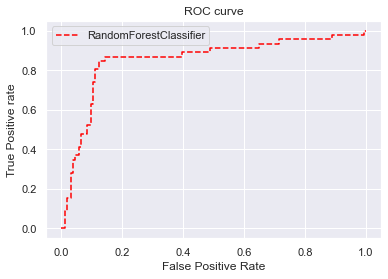

In [124]:
sn.set_theme(style="darkgrid")
plt.plot(fpr, tpr, linestyle='--',color='red', label='RandomForestClassifier')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

Got the AOC RUC

# Saving the model

In [125]:
import joblib
joblib.dump(final_model,"Final Model of Insurance Claim Fraud Detection.pkl")

['Final Model of Insurance Claim Fraud Detection.pkl']

Saved the final model